In [1]:
library(tidyverse)
library(dplyr)
library(ggplot2)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
consumer_data <- read_csv("https://raw.githubusercontent.com/Kaylan-W/Dsci_project/main/data/customer_data.csv")
head(consumer_data)

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): name, gender, education, country
dbl (4): age, income, purchase_frequency, spending

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


name,age,gender,education,income,country,purchase_frequency,spending
<chr>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>
Teresa Williams MD,42,Female,High School,53936,Slovenia,0.9,13227.120
Christine Myers,49,Female,Master,82468,Aruba,0.6,12674.040
Dwayne Moreno,55,Male,Bachelor,56941,Cyprus,0.3,5354.115
Amy Norton,24,Female,Bachelor,60651,Palau,0.2,2606.510
Tonya Adams,64,Male,Master,81884,Zambia,0.9,18984.780
Charles Smith,24,Female,PhD,61444,Libyan Arab Jamahiriya,1.0,18072.200


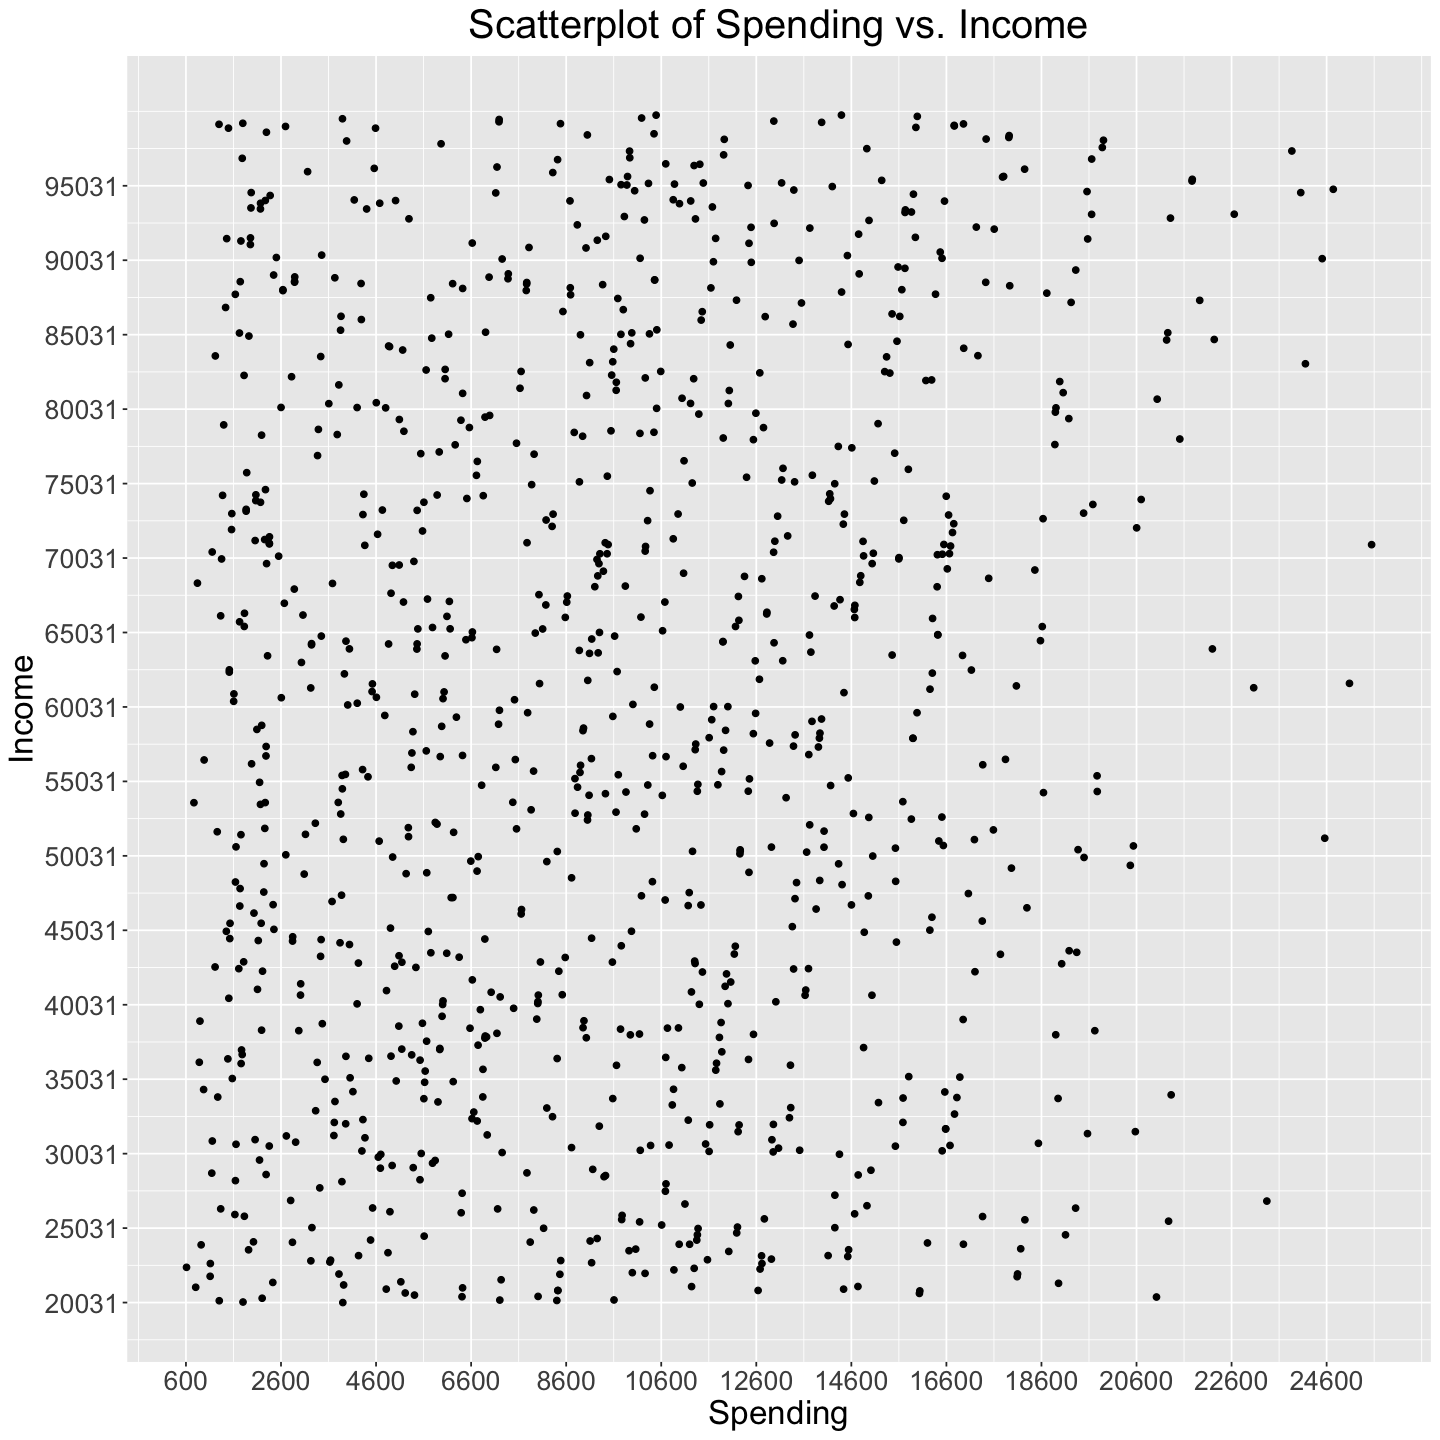

In [3]:
options(repr.plot.width = 12, repr.plot.height = 12)
eda_plot <- consumer_data |>
  ggplot(aes(x = spending, y = income)) +
  geom_point() +
  labs(x = "Spending", y = "Income") +
  ggtitle("Scatterplot of Spending vs. Income") +
  scale_y_continuous(breaks = seq(min(consumer_data$income), 100000, by = 5000)) +
  scale_x_continuous(breaks = seq(600, 26000, by = 2000)) +
  theme(
    text = element_text(size = 20),
    plot.title = element_text(hjust = 0.5) 
  )
 
eda_plot
ggsave("scatterplot_1.png", eda_plot, width = 12, height = 12)

In [4]:
transformed_data <- consumer_data |> 
            select(age, income, spending) |>
            mutate(log_10_income = log(income,10)) |>
            mutate(log_10_spending = log(spending,10)) 
            # mutate(scale_income = scale(income)) |>
            # mutate(scale_spending = scale(spending))   

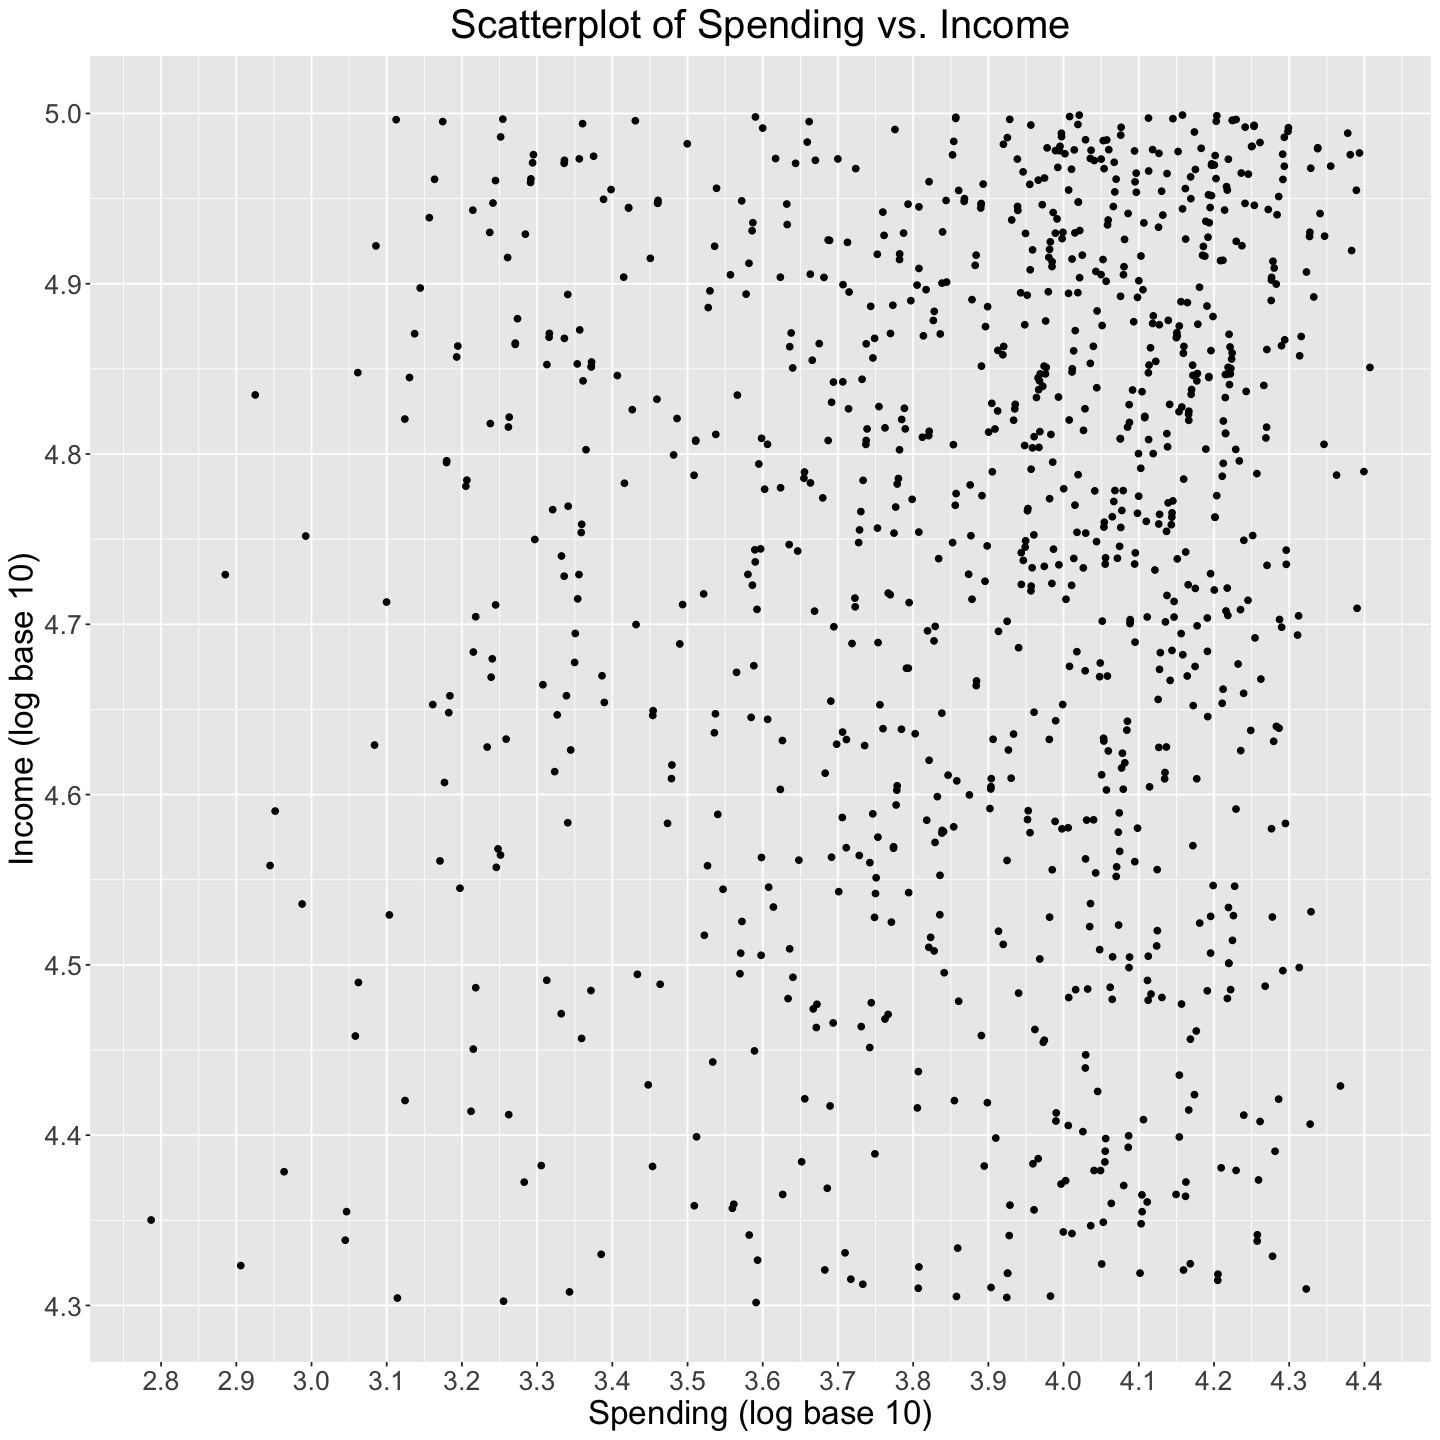

In [5]:
log_income_plot <- transformed_data |>
  ggplot(aes(x = log_10_spending, y = log_10_income)) +
  geom_point() +
  labs(x = "Spending (log base 10)", y = "Income (log base 10)") +
  ggtitle("Scatterplot of Spending vs. Income") +
  scale_x_continuous(breaks = seq(2.6, 4.5, by = 0.1)) +
  scale_y_continuous(breaks = seq(4, 5, by = 0.1)) +
  theme(
    text = element_text(size = 20),
    plot.title = element_text(hjust = 0.5) 
  )
 
log_income_plot
ggsave("scatterplot_2.png", log_income_plot, width = 12, height = 12)

In [6]:
# scale_income_plot <- transformed_data |>
#   ggplot(aes(x = scale_spending, y = scale_income)) +
#   geom_point() +
#   labs(x = "Spending", y = "Income") +
#   ggtitle("Scatterplot of Scaled Spending vs. Scaled Income") +
#   theme(
#     text = element_text(size = 20),
#     plot.title = element_text(hjust = 0.5) 
#   )
 
# scale_income_plot
# ggsave("scatterplot_3.png", scale_income_plot)